In [2]:

import seaborn as sns
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import plotly.express  as ex
import plotly.graph_objs as go
import plotly.offline  as pyo
from warnings import filterwarnings
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


plt.rc('figure',figsize=(18,11))
sns.set_context('paper',font_scale=2)


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [5]:
df=pd.read_csv('water_potability.csv')

In [ ]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Figure size 2160x2160 with 0 Axes>

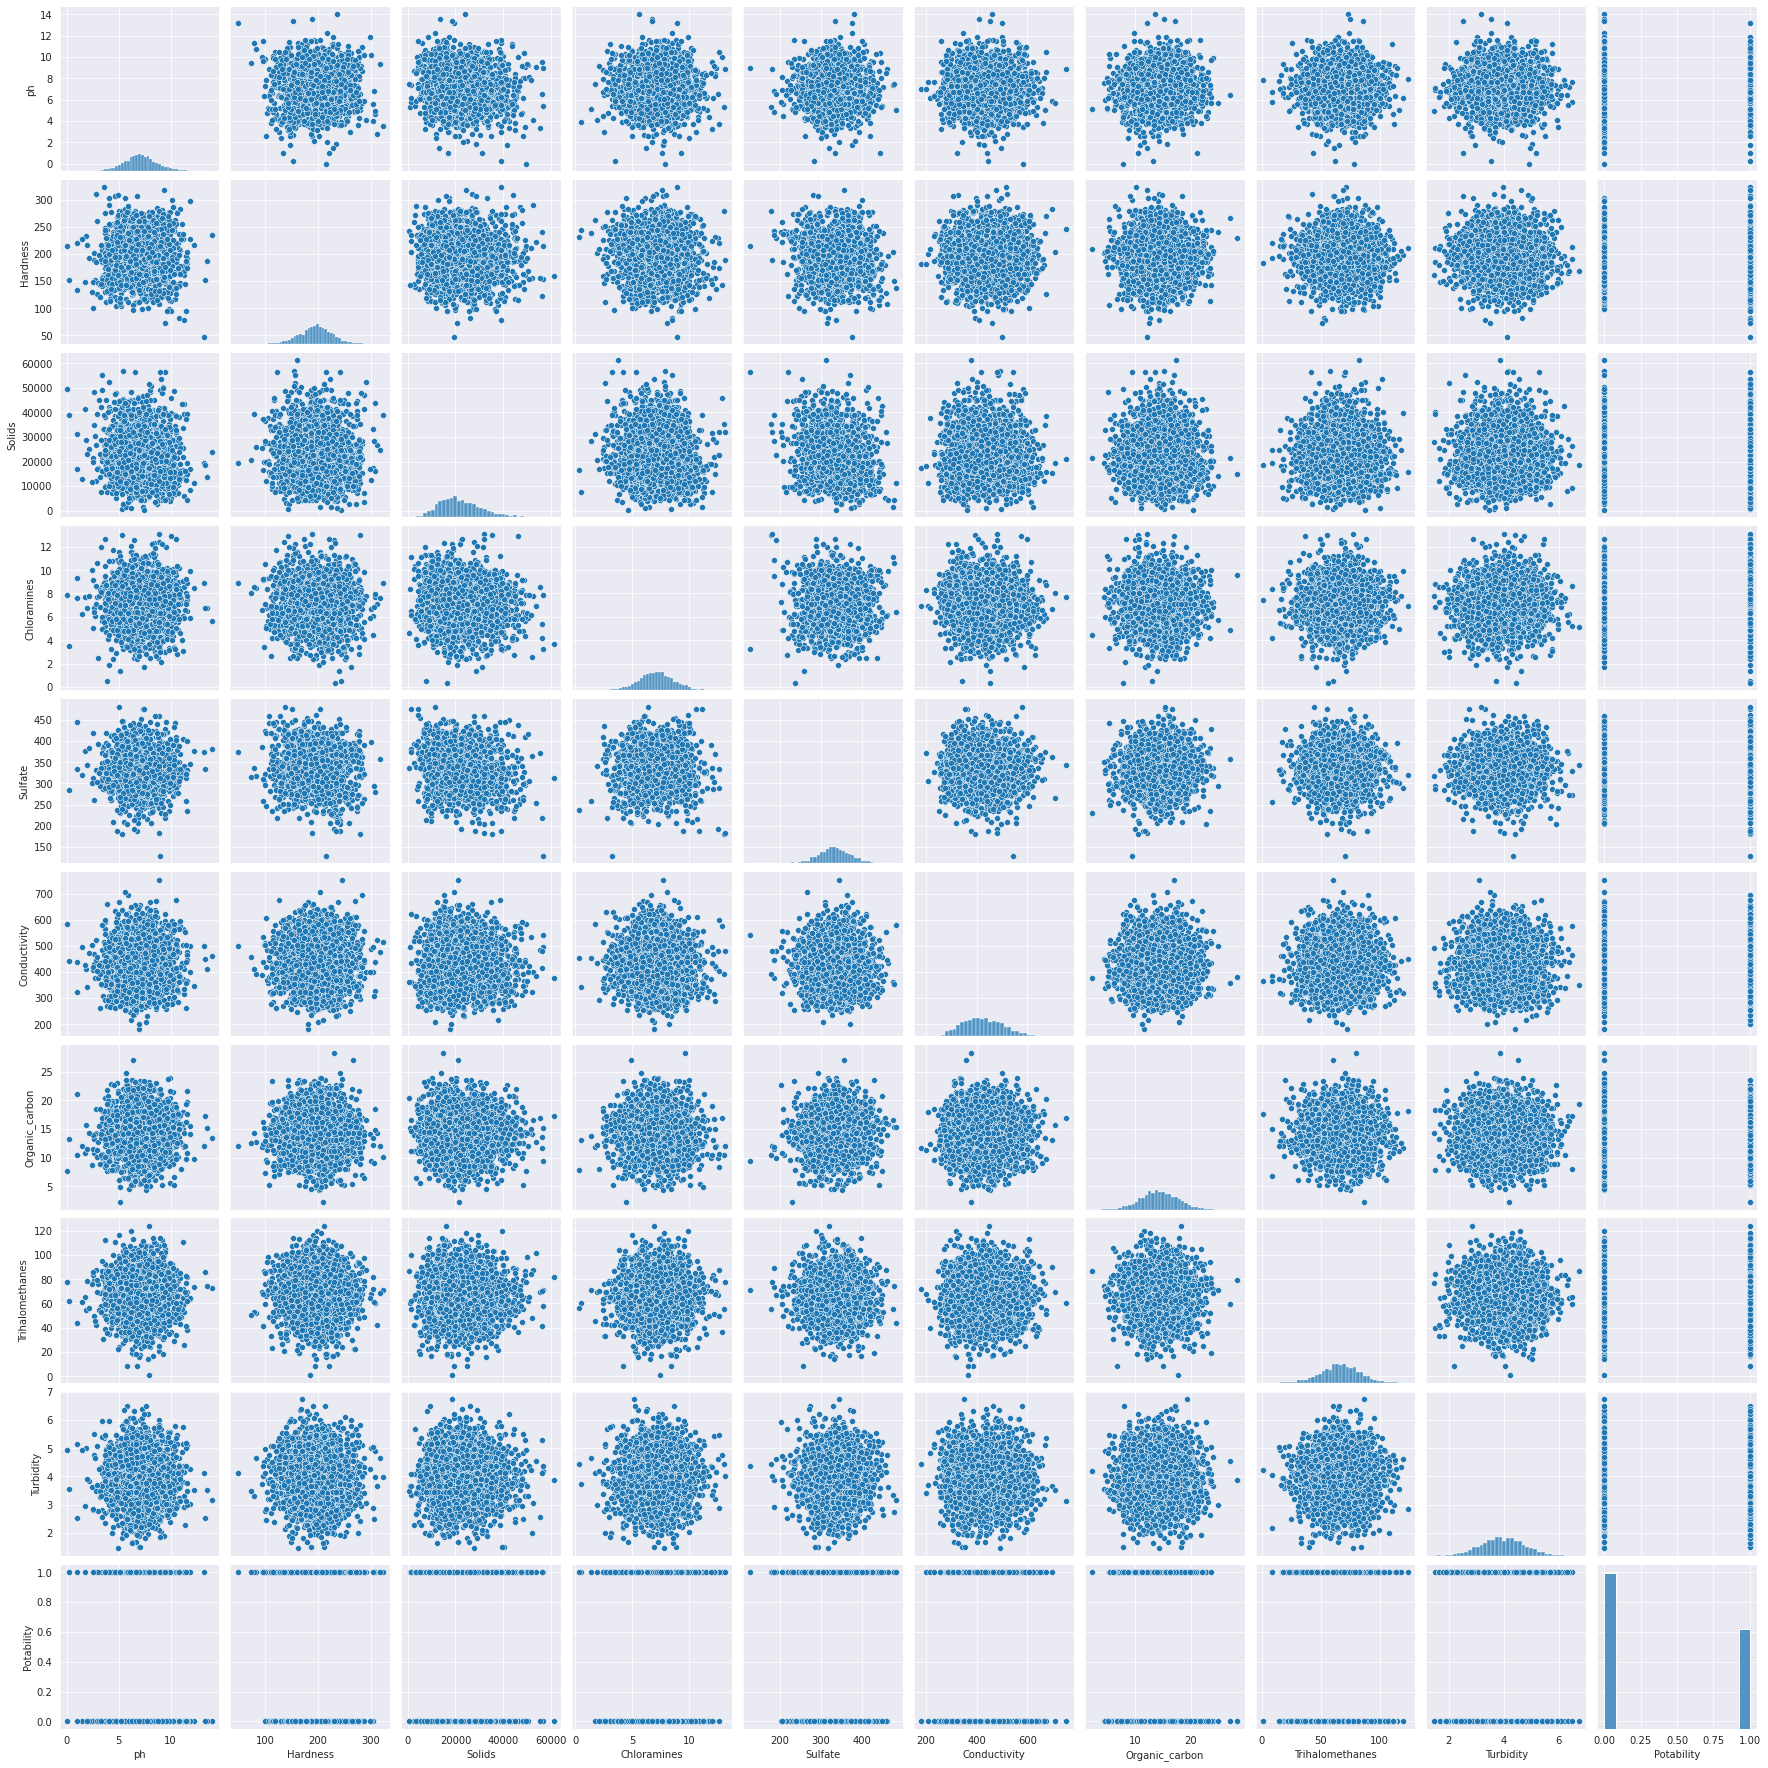

In [ ]:
fig=plt.gcf()
fig.set_size_inches(30,30)
sns.set_style('darkgrid')
sns.pairplot(df)

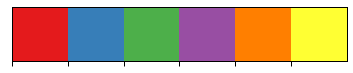

In [ ]:
colors = sb.color_palette('Set1')[0:6]
sb.palplot(colors)

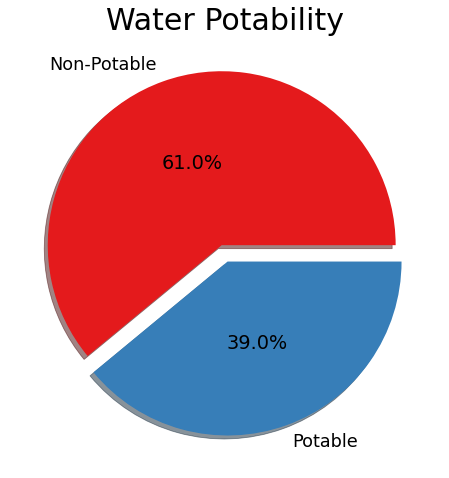

In [ ]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[18,8])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Water Potability", fontsize=30);
plt.show()

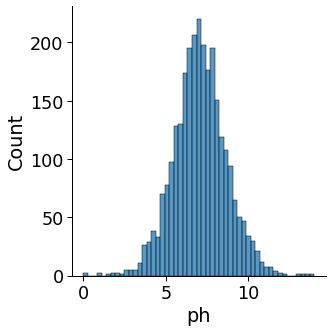

In [ ]:
sns.displot(df['ph'])
plt.show()

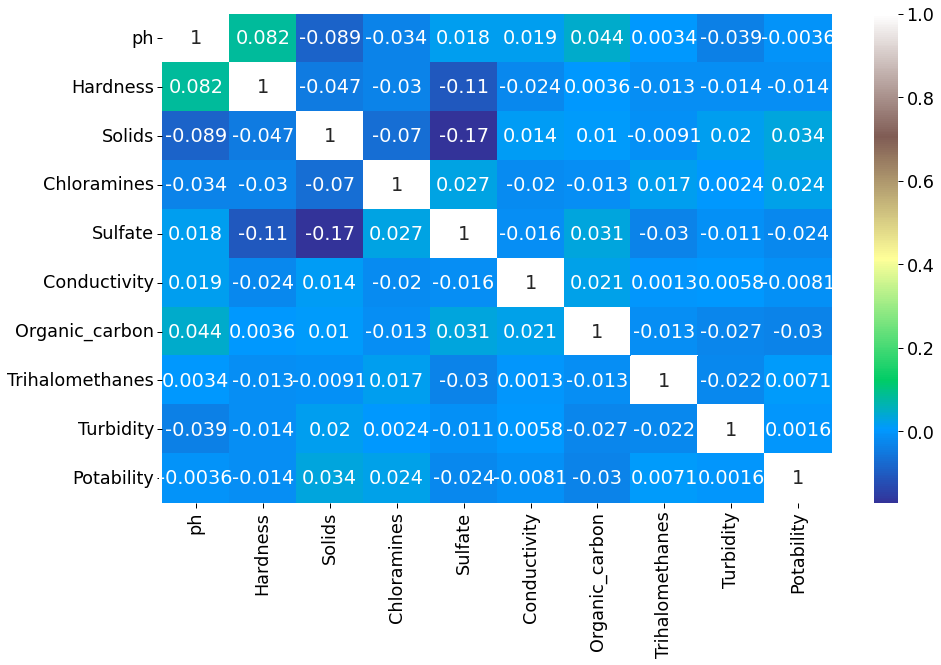

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

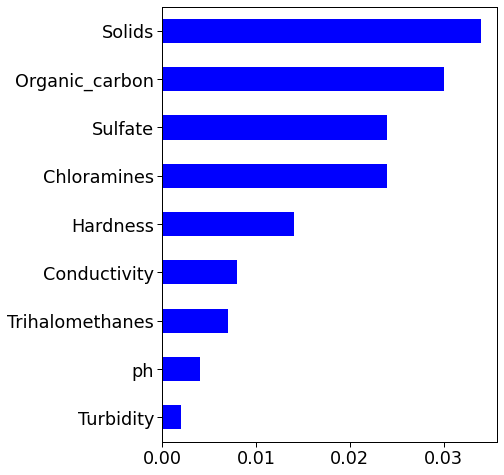

In [9]:
fig,ax = plt.subplots(figsize=(6,8))
abs(df.corr().round(3)['Potability']).sort_values()[:-1].plot.barh(color='b')

In [ ]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

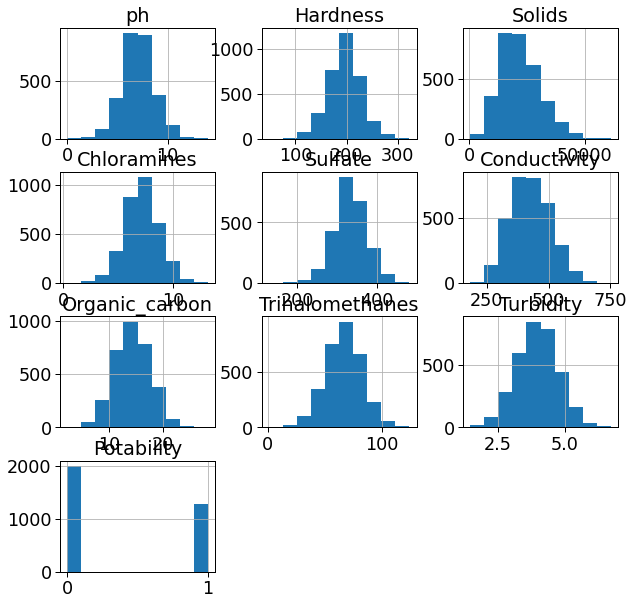

In [ ]:
df.hist(figsize=(10,10))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



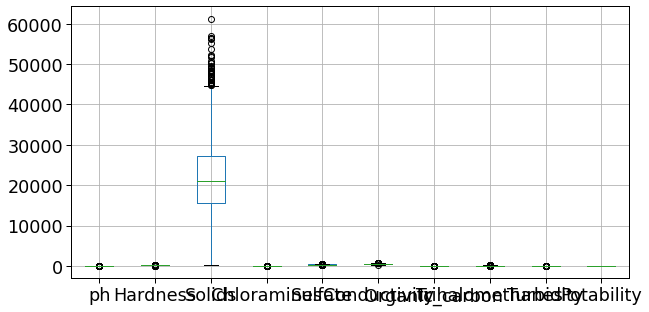

In [ ]:
df.boxplot(figsize=(10,5))

In [ ]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:


print('training shape : ',X_train.shape)
print('testing shape : ',X_test.shape)

training shape :  (2293, 9)
testing shape :  (983, 9)


In [ ]:
tree_ = DecisionTreeClassifier(criterion='entropy', random_state = 0)
tree_

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
model = Sequential() 
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/200
72/72 [==============================] - 0s 5ms/step - loss: 0.6210 - val_loss: 0.6479
Epoch 2/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6207 - val_loss: 0.6462
Epoch 3/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6210 - val_loss: 0.6486
Epoch 4/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6219 - val_loss: 0.6480
Epoch 5/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6230 - val_loss: 0.6504
Epoch 6/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.6446
Epoch 7/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6200 - val_loss: 0.6477
Epoch 8/200
72/72 [==============================] - 0s 5ms/step - loss: 0.6197 - val_loss: 0.6464
Epoch 9/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6209 - val_loss: 0.6456
Epoch 10/200
72/72 [==============================] - 0s 5ms/step - loss: 0.6192 - val_loss: 0.6488
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

31/31 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       590
           1       0.62      0.30      0.41       393

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.58       983
weighted avg       0.64      0.65      0.61       983



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[518  72]
 [274 119]]
Accuracy: 64.80162767039674%


In [ ]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
print(classification_report(y_test,y_pred))

31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       590
           1       0.62      0.32      0.42       393

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.59       983
weighted avg       0.64      0.65      0.62       983



In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

63.41

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0